In [52]:
import tensorflow as tf

In [53]:
import pandas as pd

In [54]:
import numpy as np 

In [55]:
data=pd.read_csv('data_cleaned.csv')

In [56]:
data.head()

,WorkingDay,Visit.No,M.Cancer,S.Cancer,ServTime,April,August,December,February,January,...,Saturday,Tuesday,Wednesday,F,M,In the city,Out of city,Out of province,afternoon,morning
0,1,7,1,0,691,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1
1,1,6,0,0,614,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1
2,1,2,0,0,749,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
3,1,10,0,0,450,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1
4,1,14,0,0,744,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1


In [57]:
y=data['ServTime']

In [58]:
y.head()

0    691
1    614
2    749
3    450
4    744
Name: ServTime, dtype: int64

In [59]:
x=data.drop(['ServTime'],axis=1)

In [60]:
x.head()

,WorkingDay,Visit.No,M.Cancer,S.Cancer,April,August,December,February,January,July,...,Saturday,Tuesday,Wednesday,F,M,In the city,Out of city,Out of province,afternoon,morning
0,1,7,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,1
1,1,6,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
2,1,2,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
3,1,10,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,1
4,1,14,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1


In [61]:
x=np.array(x)
y=np.array(y)

In [62]:
ydata=y

In [63]:
ymax=np.max(y)
ymin=np.min(y)

In [64]:
y=y-y.min()
y=y/y.max()

In [65]:
y

array([0.15567766, 0.13217338, 0.17338217, ..., 0.30830281, 0.08485958,
       0.31043956])

In [66]:
model=tf.keras.models.load_model('model.keras')

In [67]:
# model=tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(x.shape[1],)),
#     tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

# model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1792      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,017
Trainable params: 6,017
Non-trainable params: 0
_________________________________________________________________


In [69]:
# model.fit(x,y,epochs=1000)

In [70]:
model.save('model.keras')

In [71]:
model.evaluate(x,y)

129/129 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 4.8579e-04


[0.005748898722231388, 0.0004857906315010041]

In [72]:
x

array([[ 1,  7,  1, ...,  0,  0,  1],
       [ 1,  6,  0, ...,  0,  0,  1],
       [ 1,  2,  0, ...,  0,  0,  1],
       ...,
       [ 0,  1,  0, ...,  0,  1,  0],
       [ 0, 36,  0, ...,  0,  1,  0],
       [ 0,  5,  0, ...,  0,  1,  0]], dtype=int64)

In [73]:
y

array([0.15567766, 0.13217338, 0.17338217, ..., 0.30830281, 0.08485958,
       0.31043956])

In [74]:
pred=model.predict(x)

129/129 [==============================] - 0s 1ms/step


In [75]:
pred

array([[0.26361415],
       [0.12995312],
       [0.11438896],
       ...,
       [0.2090346 ],
       [0.12492333],
       [0.15830876]], dtype=float32)

In [76]:
pred=pred*ymax+ymin

In [77]:
pred=pred/60

In [78]:
pred

array([[18.205235],
       [10.504132],
       [ 9.607377],
       ...,
       [15.060544],
       [10.214334],
       [12.13789 ]], dtype=float32)

In [79]:
import matplotlib.pyplot as plt

In [80]:
actual=ydata/60

In [81]:
actual

array([11.51666667, 10.23333333, 12.48333333, ..., 19.85      ,
        7.65      , 19.96666667])

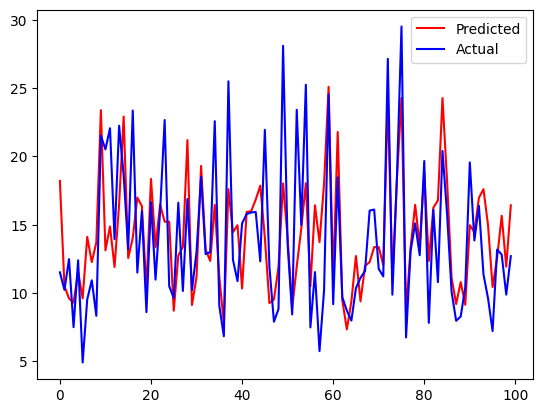

In [87]:
plt.plot(pred[:100],label='Predicted',color='red')
plt.plot(actual[:100],label='Actual',color='blue')
plt.legend()

In [83]:
diff=np.array([])
for i in range(len(pred)):
    diff=np.append(diff,abs(pred[i]-actual[i]))

In [84]:
diff

array([6.68856812, 0.27079868, 2.87595654, ..., 4.78945637, 2.56433344,
       7.82877731])

In [85]:
np.mean(diff)

2.97909108301607